In [1]:
# from sklearn.preprocessing import tfidf
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [294]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (54.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144617 files and dir

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
academy = pd.read_csv('/content/drive/My Drive/초등보습학원주소.csv')

In [152]:
academy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학원명     4989 non-null   object 
 1   학원주소    4989 non-null   object 
 2   정리주소    4989 non-null   object 
 3   bcode   4980 non-null   float64
 4   bname   4980 non-null   object 
 5   hcode   4978 non-null   float64
 6   hname   4978 non-null   object 
 7   latlng  4980 non-null   object 
dtypes: float64(2), object(6)
memory usage: 311.9+ KB


In [153]:
gu = []
for i in academy['학원주소']:
  gu.append(i[6:10].strip())
academy['시군구명'] = gu

In [154]:
academy

,학원명,학원주소,정리주소,bcode,bname,hcode,hname,latlng,시군구명
0,예맥보습학원,서울특별시 중랑구 동일로151길 30 2층3층 (묵동),서울특별시 중랑구 동일로151길 30,1.126010e+09,묵동,1.126063e+09,묵제2동,"37.6081791,127.0763503",중랑구
1,세진보습학원,서울특별시 중랑구 공릉로 58 2층4층일부 (묵동),서울특별시 중랑구 공릉로 58,1.126010e+09,묵동,1.126062e+09,묵제1동,"37.6158149,127.0792616",중랑구
2,대찬하브루타학원,"서울특별시 동대문구 전농로 120 , 3층 (전농동)",서울특별시 동대문구 전농로 120,1.123010e+09,전농동,1.123057e+09,전농제2동,"37.5756981,127.0578119",동대문구
3,장안로드맵수학학원,"서울특별시 동대문구 한천로 124 , 2층 202호 (장안동)",서울특별시 동대문구 한천로 124,1.123011e+09,장안동,1.123065e+09,장안제1동,"37.5721033,127.0661144",동대문구
4,더하이스트수학학원,"서울특별시 동대문구 사가정로 190 전농우성아파트 상가4층7,8,9호 (전농동)",서울특별시 동대문구 사가정로 190 전농우성아파트,1.123010e+09,전농동,1.123057e+09,전농제2동,"37.5783400,127.0660570",동대문구
...,...,...,...,...,...,...,...,...,...
4984,헤럴드스쿨어학원,"서울특별시 성북구 종암로 120 , 2층 일부 (종암동)",서울특별시 성북구 종암로 120,1.129014e+09,종암동,1.129070e+09,종암동,"37.6009223,127.0338772",성북구
4985,청담강북어학원,"서울특별시 강북구 삼양로27길 35-21 , 5층 501,502,504,505호 (...",서울특별시 강북구 삼양로27길 35-21,1.130510e+09,미아동,1.130558e+09,삼각산동,"37.6179397,127.0187979",강북구
4986,EIE(이아이이)어학원,"서울특별시 강북구 도봉로 189 , 4층,5층 (미아동)",서울특별시 강북구 도봉로 189,1.130510e+09,미아동,1.130554e+09,미아동,"37.6256857,127.0261652",강북구
4987,성북메가스터디학원,서울특별시 성북구 아리랑로 17 민국빌딩 1-5층 (동소문동6가),서울특별시 성북구 아리랑로 17 민국빌딩,1.129011e+09,동소문동6가,1.129058e+09,동선동,"37.5944241,127.0159501",성북구


In [159]:
academy['hcode'] = academy['hcode'].astype('str')
academy['bcode'] = academy['hcode'].astype('str')

In [171]:
academy['hcode'] = academy['hcode'].str[:-2]
# academy['bcode'] = academy['hcode'].astype('str')

In [160]:
academy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학원명     4989 non-null   object
 1   학원주소    4989 non-null   object
 2   정리주소    4989 non-null   object
 3   bcode   4989 non-null   object
 4   bname   4980 non-null   object
 5   hcode   4989 non-null   object
 6   hname   4978 non-null   object
 7   latlng  4980 non-null   object
 8   시군구명    4989 non-null   object
dtypes: object(9)
memory usage: 350.9+ KB


In [196]:
academy['구동']= academy['시군구명'] +academy['hname']
std = academy[['구동','시군구명','hcode','hname']]
# std['hcode'][0][:-2]

In [195]:
len(std['hcode'].unique())

401

3486     서울특별시 강남구 언주로 21 , 205-2호,210호,213-1호 (개포동,개포시영아파트상가)

 3660     서울특별시 서초구 서초대로 61 , 2층 (방배동)

In [10]:
academy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학원명     4989 non-null   object 
 1   학원주소    4989 non-null   object 
 2   정리주소    4989 non-null   object 
 3   bcode   4980 non-null   float64
 4   bname   4980 non-null   object 
 5   hcode   4978 non-null   float64
 6   hname   4978 non-null   object 
 7   latlng  4980 non-null   object 
dtypes: float64(2), object(6)
memory usage: 311.9+ KB


In [15]:
academy.to_excel('chemdqhtmqgkrdnjs.xlsx',encoding='cp949')

In [162]:
aca = pd.read_excel('/content/drive/My Drive/chemdqhtmqgkrdnjs.xlsx')

In [164]:
aca

,Unnamed: 0,학원명,학원주소,정리주소,bcode,bname,hcode,hname,latlng
0,0,예맥보습학원,서울특별시 중랑구 동일로151길 30 2층3층 (묵동),서울특별시 중랑구 동일로151길 30,1.126010e+09,묵동,1126063000,묵제2동,"37.6081791,127.0763503"
1,1,세진보습학원,서울특별시 중랑구 공릉로 58 2층4층일부 (묵동),서울특별시 중랑구 공릉로 58,1.126010e+09,묵동,1126062000,묵제1동,"37.6158149,127.0792616"
2,2,대찬하브루타학원,"서울특별시 동대문구 전농로 120 , 3층 (전농동)",서울특별시 동대문구 전농로 120,1.123010e+09,전농동,1123057000,전농제2동,"37.5756981,127.0578119"
3,3,장안로드맵수학학원,"서울특별시 동대문구 한천로 124 , 2층 202호 (장안동)",서울특별시 동대문구 한천로 124,1.123011e+09,장안동,1123065000,장안제1동,"37.5721033,127.0661144"
4,4,더하이스트수학학원,"서울특별시 동대문구 사가정로 190 전농우성아파트 상가4층7,8,9호 (전농동)",서울특별시 동대문구 사가정로 190 전농우성아파트,1.123010e+09,전농동,1123057000,전농제2동,"37.5783400,127.0660570"
...,...,...,...,...,...,...,...,...,...
4978,4984,헤럴드스쿨어학원,"서울특별시 성북구 종암로 120 , 2층 일부 (종암동)",서울특별시 성북구 종암로 120,1.129014e+09,종암동,1129070500,종암동,"37.6009223,127.0338772"
4979,4985,청담강북어학원,"서울특별시 강북구 삼양로27길 35-21 , 5층 501,502,504,505호 (...",서울특별시 강북구 삼양로27길 35-21,1.130510e+09,미아동,1130557500,삼각산동,"37.6179397,127.0187979"
4980,4986,EIE(이아이이)어학원,"서울특별시 강북구 도봉로 189 , 4층,5층 (미아동)",서울특별시 강북구 도봉로 189,1.130510e+09,미아동,1130553500,미아동,"37.6256857,127.0261652"
4981,4987,성북메가스터디학원,서울특별시 성북구 아리랑로 17 민국빌딩 1-5층 (동소문동6가),서울특별시 성북구 아리랑로 17 민국빌딩,1.129011e+09,동소문동6가,1129057500,동선동,"37.5944241,127.0159501"


In [163]:
aca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4983 non-null   int64  
 1   학원명         4983 non-null   object 
 2   학원주소        4983 non-null   object 
 3   정리주소        4983 non-null   object 
 4   bcode       4982 non-null   float64
 5   bname       4983 non-null   object 
 6   hcode       4983 non-null   int64  
 7   hname       4983 non-null   object 
 8   latlng      4983 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 350.5+ KB


In [165]:
aca['hcode'] = aca['hcode'].astype('str')
aca['bcode'] = aca['hcode'].astype('str')

In [166]:
aca

,Unnamed: 0,학원명,학원주소,정리주소,bcode,bname,hcode,hname,latlng
0,0,예맥보습학원,서울특별시 중랑구 동일로151길 30 2층3층 (묵동),서울특별시 중랑구 동일로151길 30,1126063000,묵동,1126063000,묵제2동,"37.6081791,127.0763503"
1,1,세진보습학원,서울특별시 중랑구 공릉로 58 2층4층일부 (묵동),서울특별시 중랑구 공릉로 58,1126062000,묵동,1126062000,묵제1동,"37.6158149,127.0792616"
2,2,대찬하브루타학원,"서울특별시 동대문구 전농로 120 , 3층 (전농동)",서울특별시 동대문구 전농로 120,1123057000,전농동,1123057000,전농제2동,"37.5756981,127.0578119"
3,3,장안로드맵수학학원,"서울특별시 동대문구 한천로 124 , 2층 202호 (장안동)",서울특별시 동대문구 한천로 124,1123065000,장안동,1123065000,장안제1동,"37.5721033,127.0661144"
4,4,더하이스트수학학원,"서울특별시 동대문구 사가정로 190 전농우성아파트 상가4층7,8,9호 (전농동)",서울특별시 동대문구 사가정로 190 전농우성아파트,1123057000,전농동,1123057000,전농제2동,"37.5783400,127.0660570"
...,...,...,...,...,...,...,...,...,...
4978,4984,헤럴드스쿨어학원,"서울특별시 성북구 종암로 120 , 2층 일부 (종암동)",서울특별시 성북구 종암로 120,1129070500,종암동,1129070500,종암동,"37.6009223,127.0338772"
4979,4985,청담강북어학원,"서울특별시 강북구 삼양로27길 35-21 , 5층 501,502,504,505호 (...",서울특별시 강북구 삼양로27길 35-21,1130557500,미아동,1130557500,삼각산동,"37.6179397,127.0187979"
4980,4986,EIE(이아이이)어학원,"서울특별시 강북구 도봉로 189 , 4층,5층 (미아동)",서울특별시 강북구 도봉로 189,1130553500,미아동,1130553500,미아동,"37.6256857,127.0261652"
4981,4987,성북메가스터디학원,서울특별시 성북구 아리랑로 17 민국빌딩 1-5층 (동소문동6가),서울특별시 성북구 아리랑로 17 민국빌딩,1129057500,동소문동6가,1129057500,동선동,"37.5944241,127.0159501"


In [26]:
str(aca['latlng']).split(',')[0]

'0       37.6081791'

In [34]:
type(aca['latlng'][0].split(',')[0])

str

In [35]:
aca['Lat'], aca['Lon'] = aca['latlng'].str.split(',', 2).str

In [122]:
df_aca = aca[['hcode','학원명','학원주소','hname','Lat','Lon']]
df_aca[df_aca['hname']=='신사동']

,hcode,학원명,학원주소,hname,Lat,Lon
3469,1168051000,수학세상학원,"서울특별시 강남구 논현로175길 59-6 , 3층 (신사동)",신사동,37.5239795,127.0242753
3514,1168051000,비하이브아카데미학원,서울특별시 강남구 도산대로25길 39 2층 (신사동),신사동,37.5221106,127.0260397
3532,1168051000,압구정지티에스(GTS)에듀학원,서울특별시 강남구 압구정로 134 304호 (신사동),신사동,37.5243941,127.0234809
3547,1168051000,압구정파인만고등1관학원,"서울특별시 강남구 압구정로 152 , 102호,103호,104호105호 (신사동)",신사동,37.5256797,127.0259510
3611,1168051000,압구정베블렌수학학원,"서울특별시 강남구 압구정로 110 , 3층 303호 (신사동,화인빌딩)",신사동,37.5230437,127.0209326
3621,1168051000,반디학원,서울특별시 강남구 도산대로25길 39 3층 (신사동),신사동,37.5221106,127.0260397
3658,1168051000,압구정베블렌3관학원,"서울특별시 강남구 압구정로 110 , 404호 (신사동)",신사동,37.5230437,127.0209326
3673,1168051000,아레테아카데미(Arete Academy)학원,"서울특별시 강남구 도산대로27길 25 , 301호 (신사동)",신사동,37.5214378,127.0273075
3707,1168051000,막강수학학원,"서울특별시 강남구 논현로175길 40 , 3층 (신사동)",신사동,37.5250380,127.0253688
3754,1168051000,베르나더스아카데미(BERNARDUS ACADEMY)학원,"서울특별시 강남구 압구정로 108 , 204호 (신사동)",신사동,37.5229864,127.0205983


관악구 신사동 : 1162068500	
강님구 신사동 : 1168051000

In [37]:
import pickle

In [175]:
stand = pd.read_pickle('/content/drive/My Drive/project/행정동별_거주인구_성별_연령.pickle')


In [176]:
stand

,ADMI_CD,ADMI_NM,5559세_2,5559세_1,5054세_1,5054세_2,4549세_1,4549세_2,4044세_1,4044세_2,3539세_1,3539세_2,3034세_1,3034세_2,2529세_1,2529세_2,2024세_1,2024세_2,1519세_1,1519세_2,1014세_1,1014세_2,0509세_2,0509세_1
1725910,1117051000,후암동,757,709,722,763,745,782,601,653,737,717,731,661,783,748,540,524,422,330,310,270,266,299
1725912,1159053000,상도1동,1691,1439,1535,1723,1716,1678,1616,1657,1580,1713,1632,1533,2631,2201,2346,2649,977,908,792,773,839,880
1725913,1111070000,숭인1동,288,305,254,293,292,258,216,202,238,209,201,197,228,225,184,179,102,114,85,92,94,98
1725917,1111061500,종로1.2.3.4가동,251,549,431,164,341,218,242,157,255,207,252,191,308,212,142,195,59,66,58,41,46,54
1725919,1117057000,원효로2동,547,586,569,634,633,640,530,576,569,530,499,489,501,530,385,471,292,440,230,341,267,271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728432,1153059500,가리봉동,425,592,589,369,411,338,284,210,332,220,379,288,498,368,257,283,96,99,72,56,65,74
1728436,1156055000,당산1동,783,774,783,756,799,718,754,701,1064,881,1149,1134,1087,1256,552,708,300,301,220,212,274,253
1728438,1141072000,북가좌2동,1486,1272,1390,1399,1383,1438,1147,1191,1210,1144,1073,1017,1373,1310,1116,1110,768,726,544,525,477,547
1728439,1165062000,방배3동,1024,856,838,916,852,1027,686,786,738,814,716,781,805,720,714,688,666,547,393,460,368,396


In [121]:
stand.columns

Index(['ADMI_CD', 'ADMI_NM', '5559세_2', '5559세_1', '5054세_1', '5054세_2',
       '4549세_1', '4549세_2', '4044세_1', '4044세_2', '3539세_1', '3539세_2',
       '3034세_1', '3034세_2', '2529세_1', '2529세_2', '2024세_1', '2024세_2',
       '1519세_1', '1519세_2', '1014세_1', '1014세_2', '0509세_2', '0509세_1'],
      dtype='object')

In [177]:
 std_ = stand[['ADMI_NM','ADMI_CD']]
 std_.columns = ['행정구역','행정동코드']
#  std.to_excel('기준.xlsx')

In [179]:
std_[std_['행정구역']=='신사동']
# 관악구 신사동 : 1162068500	
# 강님구 신사동 : 1168051000

,행정구역,행정동코드
1727712,신사동,1168051000
1727837,신사동,1162068500


In [200]:
# std[std['hcode']=='1168051000']
# 1162068500
# std[std['hcode']=='1162068500']

std.drop_duplicates(subset=['hcode'],keep='last',inplace=True)
std

,구동,시군구명,hcode,hname
68,중랑구상봉제1동,중랑구,1126058000,상봉제1동
159,중랑구중화제2동,중랑구,1126061000,중화제2동
195,중랑구면목제5동,중랑구,1126055000,면목제5동
224,동대문구전농제2동,동대문구,1123057000,전농제2동
228,중랑구묵제1동,중랑구,1126062000,묵제1동
...,...,...,...,...
4984,성북구종암동,성북구,1129070500,종암동
4985,강북구삼각산동,강북구,1130557500,삼각산동
4986,강북구미아동,강북구,1130553500,미아동
4987,성북구동선동,성북구,1129057500,동선동


In [187]:
std_

,행정구역,행정동코드
1725910,후암동,1117051000
1725912,상도1동,1159053000
1725913,숭인1동,1111070000
1725917,종로1.2.3.4가동,1111061500
1725919,원효로2동,1117057000
...,...,...
1728432,가리봉동,1153059500
1728436,당산1동,1156055000
1728438,북가좌2동,1141072000
1728439,방배3동,1165062000


In [197]:
standard = pd.merge(std_.set_index('행정동코드'),std.set_index('hcode'),left_index=True,right_index=True)
standard[standard['행정구역']=='신사동']

,행정구역,구동,시군구명,hname
1162068500,신사동,관악구신사동,관악구,신사동
1162068500,신사동,관악구신사동,관악구,신사동
1162068500,신사동,관악구신사동,관악구,신사동
1162068500,신사동,관악구신사동,관악구,신사동
1162068500,신사동,관악구신사동,관악구,신사동
1162068500,신사동,관악구신사동,관악구,신사동
1162068500,신사동,관악구신사동,관악구,신사동
1168051000,신사동,강남구신사동,강남구,신사동
1168051000,신사동,강남구신사동,강남구,신사동
1168051000,신사동,강남구신사동,강남구,신사동


In [217]:
len(df_aca['hcode'].unique())

400

In [62]:
aca_dong = df_aca.groupby('hcode').count()
aca_cnt = aca_dong[['hname']]

In [64]:
aca_cnt.reset_index(inplace=True)

In [66]:
aca_cnt.columns = ['행정동코드','보습학원개수']
aca_cnt

,행정동코드,보습학원개수
0,1111051500,1
1,1111053000,2
2,1111055000,7
3,1111056000,5
4,1111057000,3
...,...,...
395,1174064000,18
396,1174065000,6
397,1174066000,30
398,1174068500,29


In [93]:
art = pd.read_pickle('/content/drive/My Drive/행정동별_예술학원.pkl')
art.to_excel('음악학원.xlsx')

In [126]:
art.columns

Index(['행정구역', '생활밀접업종', '2018년 2분기', '2019년 2분기', '2020년 2분기', '시군구', '구동'], dtype='object')

In [127]:
a = art[['행정구역','시군구','2020년 2분기']]
a

,행정구역,시군구,2020년 2분기
6,청운효자동,종로구,15
8,사직동,종로구,13
10,삼청동,종로구,1
12,부암동,종로구,8
14,평창동,종로구,4
...,...,...,...
892,성내2동,강동구,16
894,성내3동,강동구,22
896,길동,강동구,40
898,둔촌1동,강동구,2


In [199]:
std

,구동,시군구명,hcode,hname
0,중랑구묵제2동,중랑구,1126063000,묵제2동
1,중랑구묵제1동,중랑구,1126062000,묵제1동
2,동대문구전농제2동,동대문구,1123057000,전농제2동
3,동대문구장안제1동,동대문구,1123065000,장안제1동
4,동대문구전농제2동,동대문구,1123057000,전농제2동
...,...,...,...,...
4984,성북구종암동,성북구,1129070500,종암동
4985,강북구삼각산동,강북구,1130557500,삼각산동
4986,강북구미아동,강북구,1130553500,미아동
4987,성북구동선동,성북구,1129057500,동선동


In [210]:
art_new = pd.merge(std_,a,how='outer',on='행정구역')
# art_new.drop_duplicates(subset=['행정구역'],keep='last',inplace=True)
art_new

,행정구역,행정동코드,시군구,2020년 2분기
0,후암동,1117051000,용산구,18
1,상도1동,1159053000,동작구,39
2,숭인1동,1111070000,종로구,2
3,종로1.2.3.4가동,1111061500,종로구,32
4,원효로2동,1117057000,용산구,12
...,...,...,...,...
421,가리봉동,1153059500,구로구,4
422,당산1동,1156055000,영등포구,13
423,북가좌2동,1141072000,서대문구,28
424,방배3동,1165062000,서초구,26


In [211]:
art_new[art_new['행정구역']=='신사동']
# 관악구 신사동 : 1162068500	
# 강님구 신사동 : 1168051000

,행정구역,행정동코드,시군구,2020년 2분기
281,신사동,1168051000,관악구,15
282,신사동,1168051000,강남구,67
283,신사동,1162068500,관악구,15
284,신사동,1162068500,강남구,67


In [212]:
art_new.drop([281,282],inplace=True)

In [213]:
art_new[art_new['행정구역']=='신사동']

,행정구역,행정동코드,시군구,2020년 2분기
283,신사동,1162068500,관악구,15
284,신사동,1162068500,강남구,67


In [218]:
art_new.columns = ['행정구역','행정동코드','시군구','예술학원']
art_new

,행정구역,행정동코드,시군구,예술학원
0,후암동,1117051000,용산구,18
1,상도1동,1159053000,동작구,39
2,숭인1동,1111070000,종로구,2
3,종로1.2.3.4가동,1111061500,종로구,32
4,원효로2동,1117057000,용산구,12
...,...,...,...,...
421,가리봉동,1153059500,구로구,4
422,당산1동,1156055000,영등포구,13
423,북가좌2동,1141072000,서대문구,28
424,방배3동,1165062000,서초구,26


In [215]:
aca_cnt

,행정동코드,보습학원개수
0,1111051500,1
1,1111053000,2
2,1111055000,7
3,1111056000,5
4,1111057000,3
...,...,...
395,1174064000,18
396,1174065000,6
397,1174066000,30
398,1174068500,29


In [219]:
all = pd.merge(art_new,aca_cnt,how='left',on=['행정동코드'])
all

,행정구역,행정동코드,시군구,예술학원,보습학원개수
0,후암동,1117051000,용산구,18,6.0
1,상도1동,1159053000,동작구,39,19.0
2,숭인1동,1111070000,종로구,2,1.0
3,종로1.2.3.4가동,1111061500,종로구,32,4.0
4,원효로2동,1117057000,용산구,12,3.0
...,...,...,...,...,...
419,가리봉동,1153059500,구로구,4,1.0
420,당산1동,1156055000,영등포구,13,1.0
421,북가좌2동,1141072000,서대문구,28,32.0
422,방배3동,1165062000,서초구,26,6.0


In [221]:
all.fillna(0,inplace=True)

In [223]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 423
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    424 non-null    object 
 1   행정동코드   424 non-null    object 
 2   시군구     424 non-null    object 
 3   예술학원    424 non-null    int64  
 4   보습학원개수  424 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.9+ KB


In [228]:
all['총학원수'] = all['보습학원개수'] + all['예술학원']
all

,행정구역,행정동코드,시군구,예술학원,보습학원개수,총학원수
0,후암동,1117051000,용산구,18,6.0,24.0
1,상도1동,1159053000,동작구,39,19.0,58.0
2,숭인1동,1111070000,종로구,2,1.0,3.0
3,종로1.2.3.4가동,1111061500,종로구,32,4.0,36.0
4,원효로2동,1117057000,용산구,12,3.0,15.0
...,...,...,...,...,...,...
419,가리봉동,1153059500,구로구,4,1.0,5.0
420,당산1동,1156055000,영등포구,13,1.0,14.0
421,북가좌2동,1141072000,서대문구,28,32.0,60.0
422,방배3동,1165062000,서초구,26,6.0,32.0


In [229]:
all.to_pickle('/content/drive/My Drive/project/seoul_contest/행정동별_사설학원(일반보습,예술).pkl')

강북구 번2동을 제외한 모든 행정동에는 하나 이상의 학원이 있다 !

-> nan 값은 0 으로 치환 함

-> tfidf smoothing 할 필요 없음

In [231]:
all[all['총학원수'] == 0]

,행정구역,행정동코드,시군구,예술학원,보습학원개수,총학원수
46,번2동,1130560300,강북구,0,0.0,0.0


행정동별 사설학원 tfidf (단순빈도)


weighting schema|weight|설명
--|--|--
tf(double normalization 0.5)|<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/45badc1c70ec2caa00ed8c21ed75bd9f8d3e650c" />|=0.5 + 0.5(토큰빈도/문서내최빈토큰)
idf(inverse document frequency smooth)|<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/25f4d6690acaaef1f15f308d24f6f8a439de971d" />|=log(문서갯수/(1+토큰빈도)) + 1

Tf = 문서내 토크빈도 / 문서내 전체 토큰 갯수

In [281]:
 tf = [float(all['총학원수'][i]) / float(all['총학원수'].sum()) for i in range(len(all))]
len(tf)

424

idf = log(총문서수/토큰이 등장한 문서 수)

In [282]:
idf = float(len(all.행정동코드.unique()) / (423))

In [286]:
tfidf = [x*idf for x in tf]
len(tfidf)

424

In [287]:
all['tfidf'] = tfidf

In [288]:
pop = pd.read_pickle('/content/drive/My Drive/project/행정동별_거주인구_성별_연령.pickle')
pop.columns

Index(['ADMI_CD', 'ADMI_NM', '5559세_2', '5559세_1', '5054세_1', '5054세_2',
       '4549세_1', '4549세_2', '4044세_1', '4044세_2', '3539세_1', '3539세_2',
       '3034세_1', '3034세_2', '2529세_1', '2529세_2', '2024세_1', '2024세_2',
       '1519세_1', '1519세_2', '1014세_1', '1014세_2', '0509세_2', '0509세_1'],
      dtype='object')

In [289]:
pop_i = pop[['ADMI_CD','ADMI_NM']]
pop_i['5-14세'] = pop['0509세_2'] +pop['0509세_1']+pop['1014세_1']+pop['1014세_2']
pop_i['5-9세(저학년)'] = pop['0509세_2'] +pop['0509세_1']
pop_i.columns = ['행정동코드','행정동','5-14세','5-9세(저학년)']

In [290]:
all_a = pd.merge(pop_i,all,how='inner',on=['행정동코드'])

In [291]:
all_a['1인당학원수'] = all_a['총학원수'] / all_a['5-14세']
all_a.sort_values(by='1인당학원수',ascending=True)

,행정동코드,행정동,5-14세,5-9세(저학년),행정구역,시군구,예술학원,보습학원개수,총학원수,tfidf,1인당학원수
46,1130560300,번2동,918,432,번2동,강북구,0,0.0,0.0,0.000000,0.000000
296,1168075000,수서동,487,245,수서동,강남구,1,0.0,1.0,0.000078,0.002053
337,1147061000,신월6동,1076,567,신월6동,양천구,3,0.0,3.0,0.000234,0.002788
195,1171056600,오륜동,2460,1007,오륜동,송파구,5,3.0,8.0,0.000625,0.003252
278,1111060000,가회동,300,137,가회동,종로구,1,0.0,1.0,0.000078,0.003333
...,...,...,...,...,...,...,...,...,...,...,...
304,1162068500,신사동,939,443,신사동,강남구,67,7.0,74.0,0.005777,0.078807
11,1168063000,대치4동,1408,493,대치4동,강남구,76,86.0,162.0,0.012647,0.115057
76,1144066000,서교동,977,455,서교동,마포구,129,9.0,138.0,0.010774,0.141249
3,1111061500,종로1.2.3.4가동,199,100,종로1.2.3.4가동,종로구,32,4.0,36.0,0.002811,0.180905


In [4]:
all_a.columns
# all_a.to_pickle('/content/drive/My Drive/project/seoul_contest/대체시설tfidf.pkl')
all_a = pd.read_pickle('/content/drive/My Drive/project/seoul_contest/대체시설tfidf.pkl')

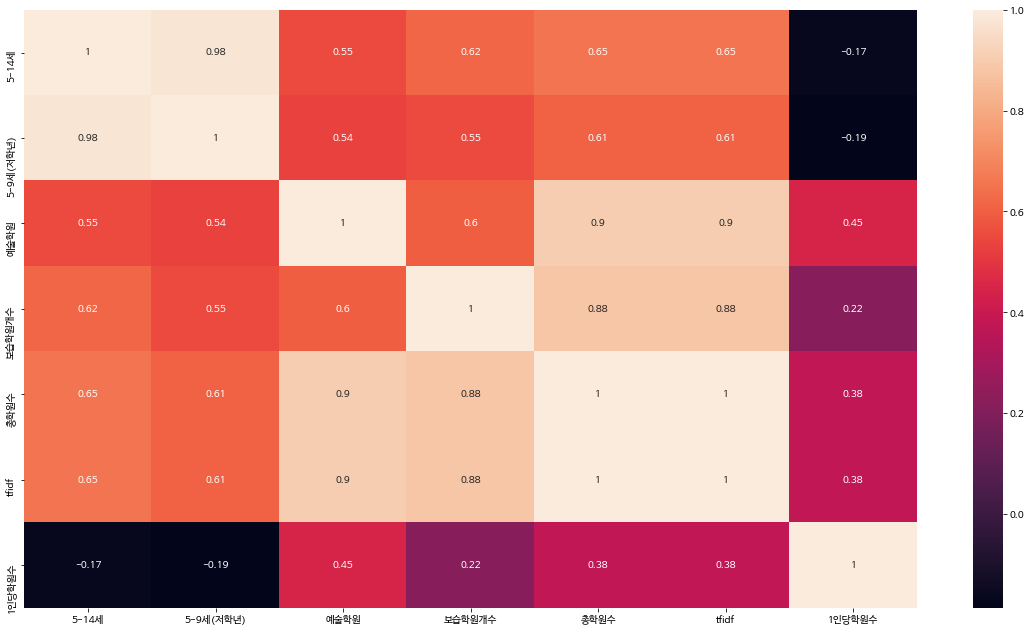

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.figure(figsize=(20,11))
var= all_a[['5-14세', '5-9세(저학년)', '예술학원', '보습학원개수',
       '총학원수', 'tfidf', '1인당학원수']].corr()
sns.heatmap(var, annot=True)
plt.rc('font', family='NanumBarunGothic') 
plt.show()

### 수요 지수

5~14세 인구 비율 * ( 센터tfidf / 대체시설tfidf )